<a id="Header"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#0D4C92;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          LOAN PREDICTION
</p>
</div>

<p style="text-align:center">
    <img src="https://img.etimg.com/thumb/width-1200,height-900,imgsize-18534,resizemode-1,msid-93105346/wealth/borrow/10-best-no-credit-check-loans-and-bad-credit-loans-with-guaranteed-approval.jpg" width="250" alt="Water"  />
    </a>
</p>

<a id="Table"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          Table of Contents
</p>
</div>


* [1. Introduction](#1)
    * [1.1 Import Libraries](#1.1)
    * [1.2 Load the Dataset](#1.2)
    * [1.3 An Overview of the Dataset](#1.3)
    
    
* [2. EDA & Data Preprocessing](#2)
    * [2.1 Descriptive Statistics](#2.1)
    * [2.2 Identify and handle missing values](#2.2)
    * [2.3 Correct data format](#2.3)
    * [2.4 Data distributions & Outliers](#2.4)
    * [2.5 Normalize data](#2.5)
    * [2.6 Handle outliers](#2.6)
    * [2.7 Correlation Heatmap](#2.7)
    
    
* [3. Prediction Model](#3)
    * [3.1 Prepare the data for model building](#3.1)
    * [3.2 Build the models](#3.2)
    * [3.3 Evaluate the models](#3.3)
    * [3.4 Confusion Matrix](#3.4)

* [4. Conclusion & Recommendation](#4)
    * [4.1 Model selection](#4.1)
    * [4.2 Model Deployment](#4.2)
 
* [5. References](#5)

<a id="1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          1.Introduction
</p>
</div>

[Return Table of Contents](#Table)

### About The Dataset
#### Context
> Company X deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form.

#### Content
> This dataset contains the loan history of the company's previous customers. The detail of each column of the dataset is as follows:

|No.|Column Name|Description|
|---|---|---|
|1|Loan_ID|Unique Loan ID|
|2|Gender|Male/ Female|
|4|Dependents|Number of dependents|
|5|Education|Applicant Education (Graduate/ Undergraduate)|
|6|Self_Employed|Self-employed (Y/N)|
|7|ApplicantIncome|Applicant income|
|8|CoapplicantIncome|Coapplicant income|
|9|LoanAmount|Loan amount in thousands|
|10|Loan_Amount_Term|Term of a loan in months|
|11|Credit_History|credit history meets guidelines|
|12|Property_Area|Urban / Semi-Urban / Rural|
|13|Loan_Status|Loan approved (Y/N)|

#### Main Task
The main purpose of this project is to explore the dataset and create a simple model to predict the loan status for new customers


<a id="1.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          1.1 Import Libraries 
</p>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<a id="1.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          1.2 Load The dataset 
</p>
</div>

In [2]:
df = pd.read_csv('company-x-loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a id="1.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          1.3 An Overview Of The Dataset
</p>
</div>

In [3]:
df.shape

(614, 13)

> The dataset contains 614 rows and 13 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


> This dataset contains missing values and some columns have incorrect data type

<a id="2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          2. EDA & Data Preprocessing
</p>
</div>

[Return Table of Contents](#Table)

<a id="2.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.1. Descriptive Statistics
</p>
</div>

### Categorical Data

In [5]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002435,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Numerical Data

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Check duplicates

In [7]:
df.duplicated().any()

False

> There is no duplicated rows in the dataset

<a id="2.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.2. Identify and handle missing values
</p>
</div>

<h3 id="identify_missing_values">Identify missing values</h3>

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

> Based on the summary above, each column has 614 rows of data, 7 columns containing missing data:

><ol>
    ><li>"Gender": 13 missing data</li>
    ><li>"Married": 3 missing data</li>
    ><li>"Dependents": 15 missing data</li>
    ><li>"Self_Employed" : 32 missing data</li>
    ><li>"LoanAmount": 22 missing data</li>
    ><li>"Loan_Amount_Term": 14 missing data</li>
    <li>"Credit_History": 50 missing data</li>
></ol>

<h3 id="handle_missing_values">Handle missing values</h3>
<span style="color:blue"> STEP 1: Drop rows with more than 1 missing values</span> 

In [9]:
df.dropna(how='any',thresh=12,inplace=True)

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               0
Dependents           10
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

<span style="color:blue"> STEP 2: Replace numerical data by mean</span> 

In [11]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               0
Dependents           10
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

<span style="color:blue"> STEP 3: Replace categorical data by mode</span> 

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

> All missing data has been dropped or replaced

<a id="2.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.3. Correct data format
</p>
</div>

In [15]:
# The ApplicantIncome column should be converted into float type to match the CoapplicantIncome column
df["ApplicantIncome"] = df["ApplicantIncome"].astype('float64')

# Term of a loan is counted by months so the Loan_Amount_Term should be converted into int type
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype('int64')

<a id="2.4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.4. Data distributions & Outliers
</p>
</div>

### Continuous numerical data distribution

Text(0.5, 0.98, 'Visualizing continuous numerical columns')

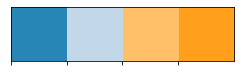

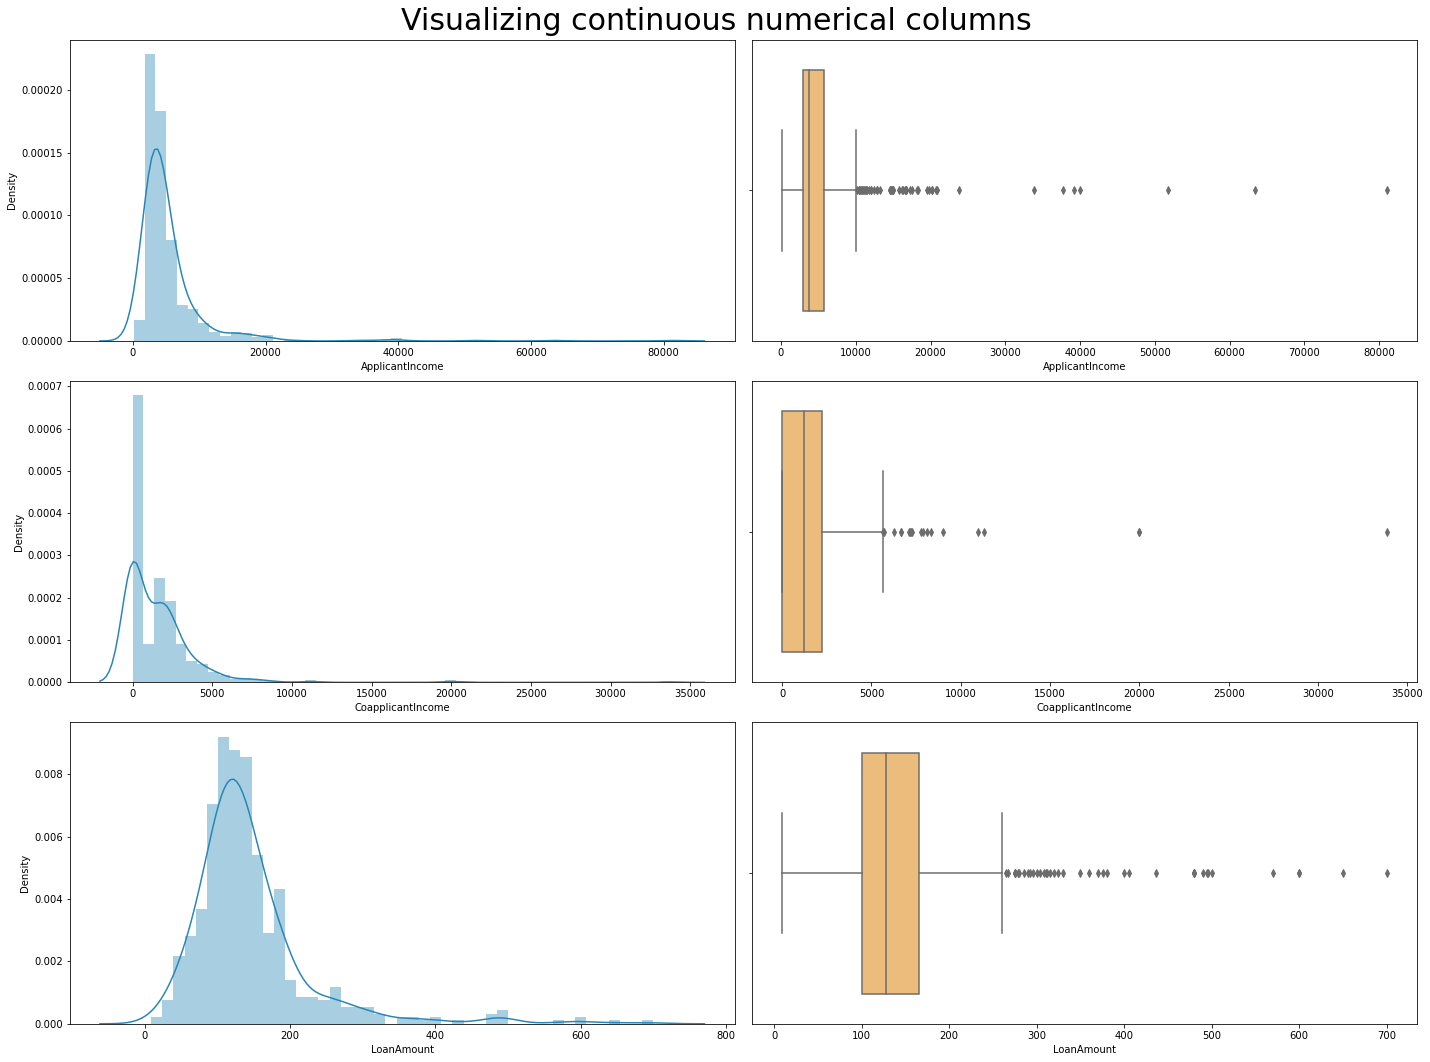

In [16]:
theme = ['#2786b5', '#C2D7E8', '#FFBF69', '#FF9F1C']
sns.palplot(sns.color_palette(theme))

import warnings
warnings.filterwarnings('ignore')

num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

fig,ax = plt.subplots(len(num_cols), 2, figsize=(20,15))
for index,i in enumerate(num_cols ):
    sns.distplot(df[i], ax = ax[index,0], color = theme[0])
    sns.boxplot(df[i], ax = ax[index,1], color = theme[2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous numerical columns",fontsize=30)

> <p> These 3 variables are clearly right skewed <br>
> There are a lot of outliers for these 3 variables </p>
> <p> => It's necessary to normalize the data and deal with the outliers </p>

### Bivariate Analysis

Text(0.5, 1.08, 'Loan Status')

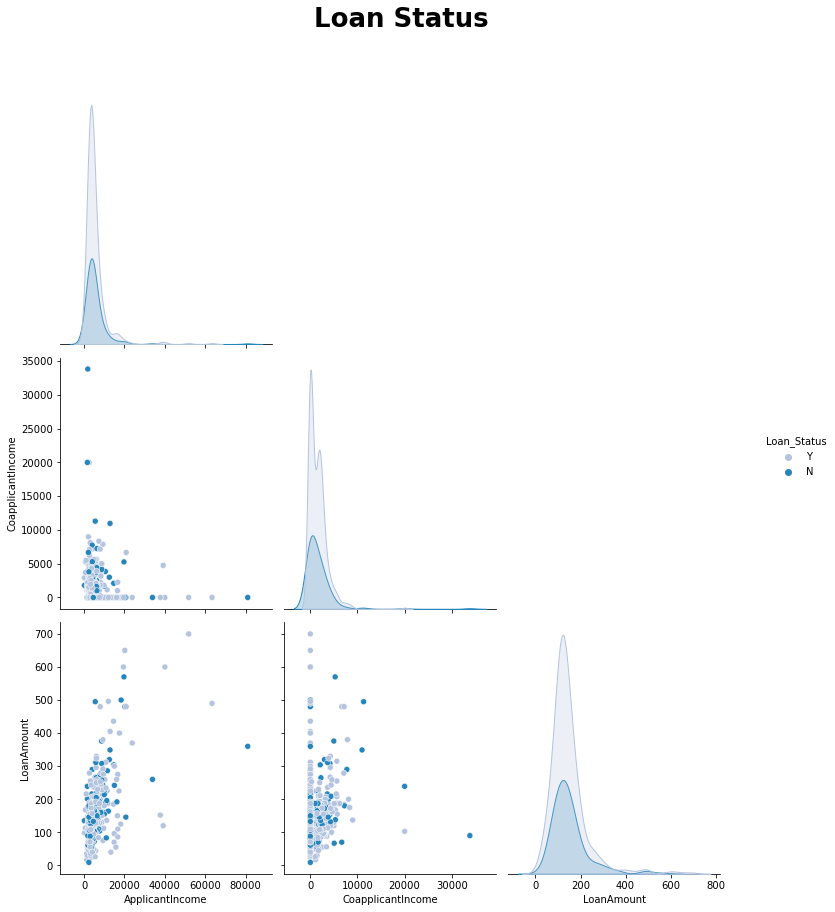

In [17]:
ax = sns.pairplot(df.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']], hue = 'Loan_Status', diag_kind = 'kde', kind = 'scatter', palette = 'PuBu', corner = True)
ax.fig.set_size_inches(12,12)
ax.fig.suptitle('Loan Status', y=1.08, size = 26, weight='bold')

<a id="2.5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.5. Normalize Data
</p>
</div>

<AxesSubplot:xlabel='Loan_Amount_Log'>

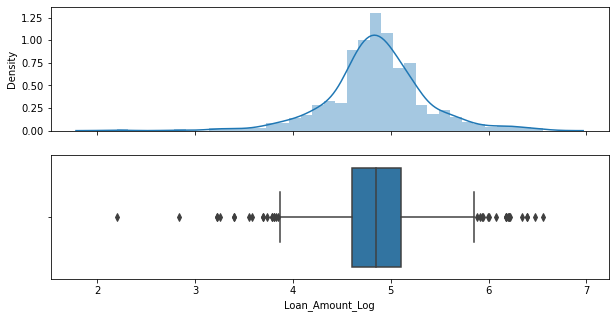

In [18]:
df['Loan_Amount_Log'] = np.log(df['LoanAmount'])

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,5))
sns.distplot(x = df['Loan_Amount_Log'], ax = axes[0])
sns.boxplot(x = df['Loan_Amount_Log'], ax = axes[1])

<AxesSubplot:xlabel='Applicant_Income_Log'>

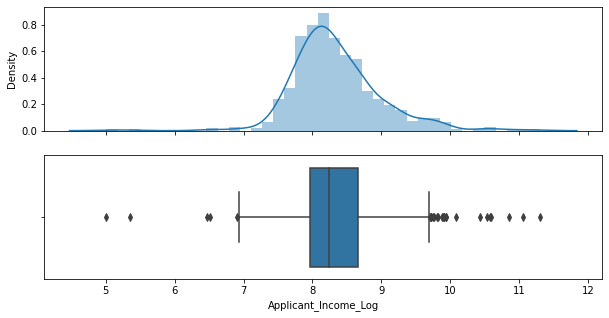

In [19]:
df['Applicant_Income_Log'] = np.log(df['ApplicantIncome'])

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,5))
sns.distplot(x = df['Applicant_Income_Log'], ax = axes[0])
sns.boxplot(x = df['Applicant_Income_Log'], ax = axes[1])

<AxesSubplot:xlabel='Coapplicant_Income_Log'>

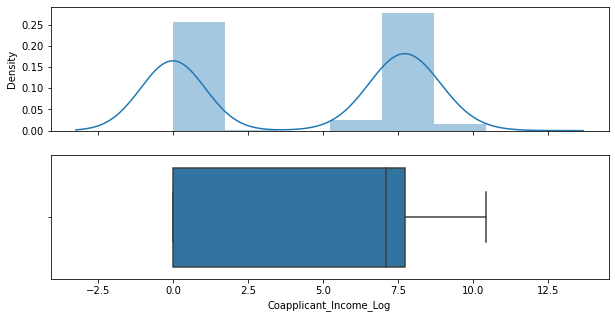

In [20]:
df['Coapplicant_Income_Log'] = np.log(df['CoapplicantIncome'])
df['Coapplicant_Income_Log'] = df['Coapplicant_Income_Log'].replace(-np.inf, 0)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,5))
sns.distplot(x = df['Coapplicant_Income_Log'], ax = axes[0])
sns.boxplot(x = df['Coapplicant_Income_Log'], ax = axes[1])

<a id="2.6"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.6. Handle Outliers
</p>
</div>

In [21]:
OldShape = df.shape

In [22]:
#df = df[df.loc[:,'Total_Income_Log']<9.6]
normalized_num_cols = ['Applicant_Income_Log','Coapplicant_Income_Log','Loan_Amount_Log']
for i in normalized_num_cols:
    Q3,Q1 = np.percentile(df.loc[:,i],[75,25])
    IQR = Q3-Q1
 
    upper_bound = Q3+(1.5*IQR)
    lower_bound = Q1-(1.5*IQR)
    
    df = df[(df[i]>lower_bound) & (df[i]<upper_bound)]

Text(0.5, 0.98, 'Visualizing continuous numerical columns')

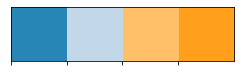

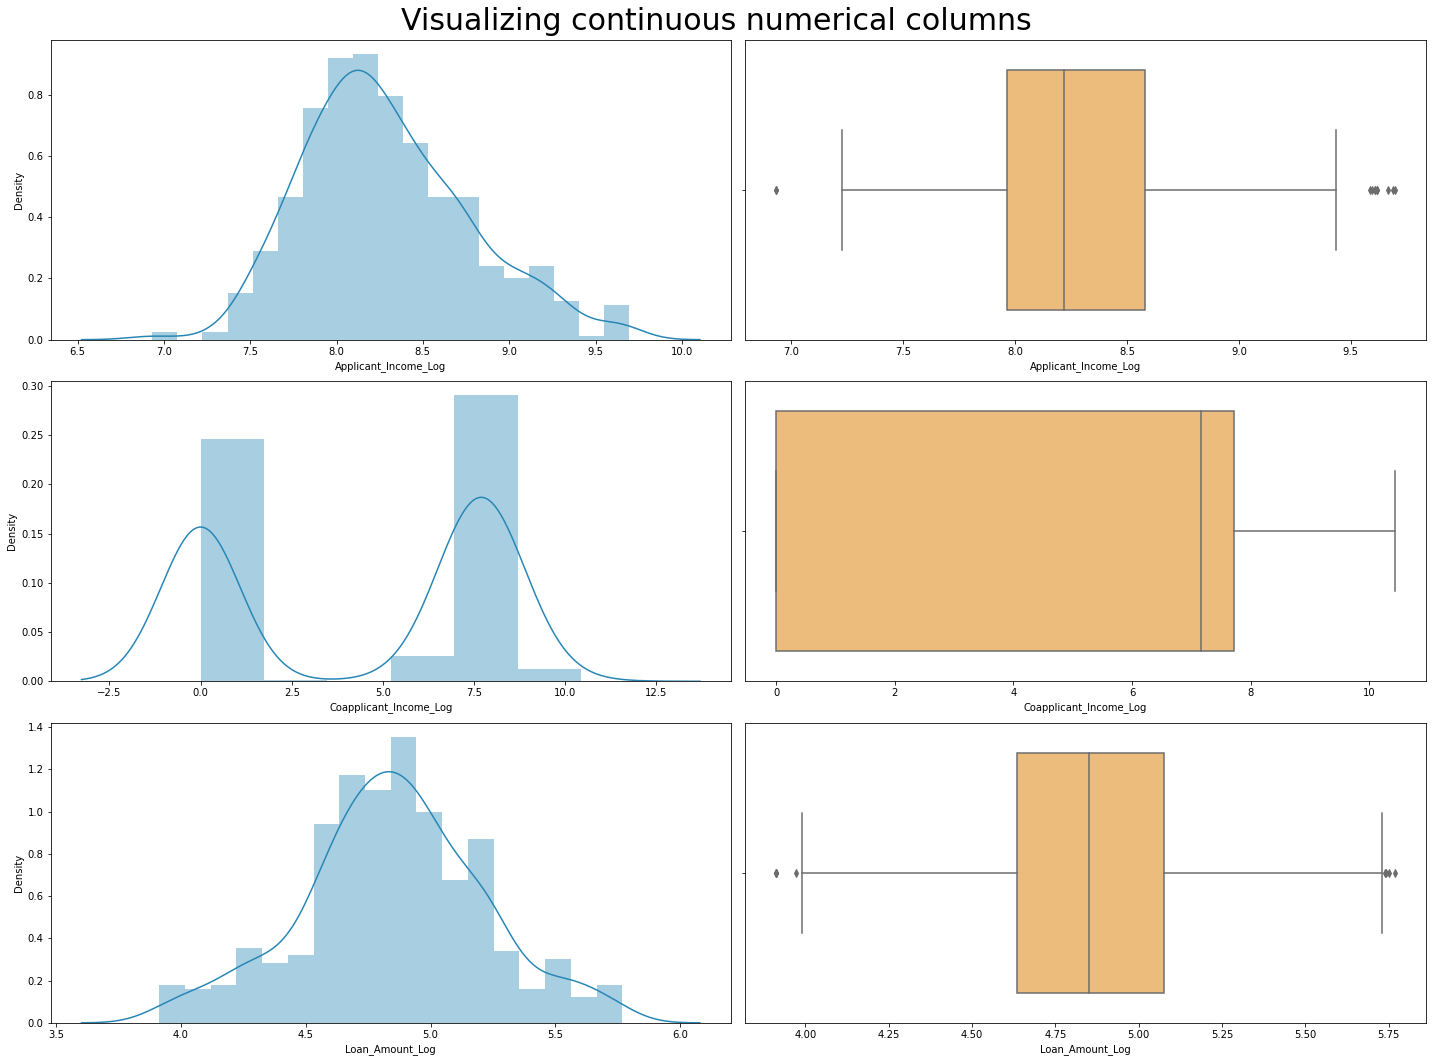

In [23]:
theme = ['#2786b5', '#C2D7E8', '#FFBF69', '#FF9F1C']
sns.palplot(sns.color_palette(theme))

import warnings
warnings.filterwarnings('ignore')

normalized_num_cols = ['Applicant_Income_Log','Coapplicant_Income_Log','Loan_Amount_Log']

fig,ax = plt.subplots(len(normalized_num_cols), 2, figsize=(20,15))
for index,i in enumerate(normalized_num_cols):
    sns.distplot(df[i], ax = ax[index,0], color = theme[0])
    sns.boxplot(df[i], ax = ax[index,1], color = theme[2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous numerical columns",fontsize=30)

In [24]:
NewShape = df.shape

print("Dataframe's shape before removing outliers :", OldShape)
print("Dataframe's shape after removing outliers :", NewShape)

Dataframe's shape before removing outliers : (601, 16)
Dataframe's shape after removing outliers : (545, 16)


> Now that we have removed most of the outliers in numerical columns, let's move on to the next step

<a id="2.7"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.7. Correlation Heatmap
</p>
</div>

Text(0.5, 1.0, 'Correlation of Features')

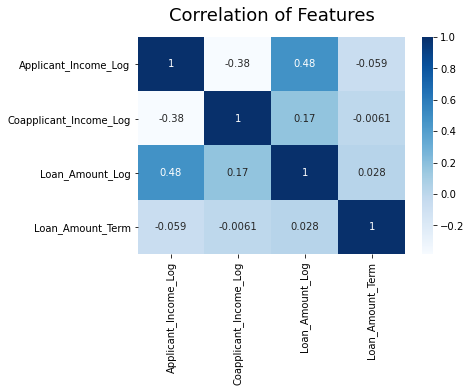

In [25]:
corr = df[['Applicant_Income_Log','Coapplicant_Income_Log','Loan_Amount_Log','Loan_Amount_Term']].corr()
heatmap = sns.heatmap(corr, annot = True, cmap = 'Blues')

heatmap.set_title('Correlation of Features', fontdict= {'fontsize': 18}, pad = 16)

<a id="3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          3. PREDICTION MODEL
</p>
</div>

[Return Table of Contents](#Table)

In [26]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Log,Applicant_Income_Log,Coapplicant_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,145.869416,360,1.0,Urban,Y,4.982712,8.674026,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360,1.0,Rural,N,4.852030,8.430109,7.318540
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360,1.0,Urban,Y,4.189655,8.006368,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360,1.0,Urban,Y,4.787492,7.856707,7.765569
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360,1.0,Urban,Y,4.948760,8.699515,0.000000
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,360,1.0,Urban,Y,5.587249,8.597297,8.341887
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.000000,360,1.0,Urban,Y,4.553877,7.754910,7.323831
7,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.000000,360,0.0,Semiurban,N,5.062595,8.018296,7.825645
8,LP001018,Male,Yes,2,Graduate,No,4006.0,1526.0,168.000000,360,1.0,Urban,Y,5.123964,8.295549,7.330405
10,LP001024,Male,Yes,2,Graduate,No,3200.0,700.0,70.000000,360,1.0,Urban,Y,4.248495,8.070906,6.551080


<a id="3.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          3.1. Prepare the data for building models
</p>
</div>

In [27]:
X = df.loc[:,['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History',
              'Property_Area','Loan_Amount_Log','Applicant_Income_Log','Coapplicant_Income_Log']]

y = df.loc[:,'Loan_Status']

### Encode the categorical data

In [28]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_X = LabelEncoder()
LabelEncoder_y = LabelEncoder()

In [29]:
y = LabelEncoder_y.fit_transform(y)

In [30]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [31]:
for i in (0,1,2,3,4,7):
    X.iloc[:,i] = LabelEncoder_X.fit_transform(X.iloc[:,i])

In [32]:
X.head(11)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_Log,Applicant_Income_Log,Coapplicant_Income_Log
0,1,0,0,0,0,360,1.0,2,4.982712,8.674026,0.000000
1,1,1,1,0,0,360,1.0,0,4.852030,8.430109,7.318540
2,1,1,0,0,1,360,1.0,2,4.189655,8.006368,0.000000
3,1,1,0,1,0,360,1.0,2,4.787492,7.856707,7.765569
4,1,0,0,0,0,360,1.0,2,4.948760,8.699515,0.000000
5,1,1,2,0,1,360,1.0,2,5.587249,8.597297,8.341887
6,1,1,0,1,0,360,1.0,2,4.553877,7.754910,7.323831
7,1,1,3,0,0,360,0.0,1,5.062595,8.018296,7.825645
8,1,1,2,0,0,360,1.0,2,5.123964,8.295549,7.330405
10,1,1,2,0,0,360,1.0,2,4.248495,8.070906,6.551080


### Split the dataset into train and test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<a id="3.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          3.2. Build the models
</p>
</div>

In [34]:
#score
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error

#models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import NearestCentroid,KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [35]:
#finding the best models with base parameters
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Ridge', RidgeClassifier()),
    ('SGD Classifier', SGDClassifier(max_iter=1000, tol=1e-3)),
    ('Support Vector Classifier', SVC()),
    ('NuSVC', NuSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('Bernoulli NB', BernoulliNB()),
    ('Perc', Perceptron()),
    ('Nearest Centroid', NearestCentroid()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Ada Boost Classifier', AdaBoostClassifier()),
    ('XGB Classifier', XGBClassifier(verbosity = 0)),
    ('Passive Aggressive', PassiveAggressiveClassifier())
]

results = dict()
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    score = accuracy_score(y_test, pred)    
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    precision = precision_score(y_test, pred) 
    results[name] = [score, precision, mae, mse] 

In [36]:
#storing the results into dataframe
df_results = pd.DataFrame(results)
df_results = df_results.transpose()
df_results = df_results.rename(columns = {0:'Score', 1:'Precision', 2: 'MAE', 3: 'MSE'}).sort_values(by='Score',ascending=False)

<a id="3.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          3.3. Evaluate the models
</p>
</div>

In [37]:
df_results.reset_index()
df_results

,Score,Precision,MAE,MSE
XGB Classifier,0.825688,0.835443,0.174312,0.174312
Logistic Regression,0.816514,0.788889,0.183486,0.183486
Ridge,0.816514,0.788889,0.183486,0.183486
Gaussian NB,0.816514,0.788889,0.183486,0.183486
Bernoulli NB,0.816514,0.788889,0.183486,0.183486
Random Forest Classifier,0.807339,0.807229,0.192661,0.192661
Ada Boost Classifier,0.788991,0.781609,0.211009,0.211009
Decision Tree,0.752294,0.816901,0.247706,0.247706
NuSVC,0.733945,0.779221,0.266055,0.266055
SGD Classifier,0.660550,0.660550,0.339450,0.339450


<a id="3.4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          3.4. Confusion Matrix
</p>
</div>

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [38]:
model = XGBClassifier(verbosity = 0)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [39]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 13],
       [ 6, 66]], dtype=int64)

<AxesSubplot:>

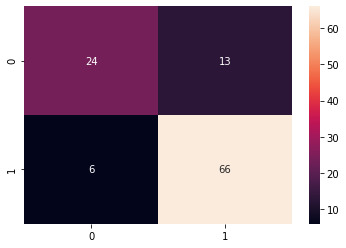

In [40]:
sns.heatmap(cm, annot=True)

<a id="4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          4. CONCLUSION & RECOMMENDATIONS
</p>
</div>

[Return Table of Contents](#Table)

<a id="4.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          4.1. Model selection
</p>
</div>

#### From the model evaluation above, our group has concluded that XGB Classifier Model is the optimal prediction model with the highest accuracy score, high precision, low mean squared error and low mean absolute error

<a id="4.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          4.1. Loan Prediction Model Deployment
</p>
</div>

In [41]:
import pickle

In [42]:
filename = 'Loan_prediction.sav'
pickle.dump(model, open(filename, 'wb'))

In [43]:
loaded_model = pickle.load(open('Loan_prediction.sav', 'rb'))

### Test model deployment with the X_test dataset

In [44]:
X_test.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_Log,Applicant_Income_Log,Coapplicant_Income_Log
269,0,0,1,0,0,360,1.0,2,4.49981,7.964156,7.352441


In [45]:
input_data = (0,0,1,0,0,360,1.0,2,4.49981,7.964156,7.352441)

input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Loan disapproved!')
else:
  print('Loan approved!')

[1]
Loan approved!


### Model Deployment 1

In [47]:
df.iloc[200,:]

Loan_ID                       LP001754
Gender                            Male
Married                            Yes
Dependents                           0
Education                 Not Graduate
Self_Employed                      Yes
ApplicantIncome                 4735.0
CoapplicantIncome                  0.0
LoanAmount                       138.0
Loan_Amount_Term                   360
Credit_History                     1.0
Property_Area                    Urban
Loan_Status                          N
Loan_Amount_Log               4.927254
Applicant_Income_Log          8.462737
Coapplicant_Income_Log             0.0
Name: 226, dtype: object

In [50]:
Gender = input('Gender (Female=0, Male=1): ')
Married = input('Maritual Status (Not Married=0, Married=1): ')
Dependents = input('Number of dependents: ')
Education = input('Education (Graduate=0, Not graduate=1): ')
Self_Employed = input('Self Employment (No=0, Yes=1): ')
ApplicantIncome = input('Applicant income: ')
CoapplicantIncome = input('Coapplicant income: ')
LoanAmount = input('Loan amount in thousands: ')
Loan_Amount_Term = input('Term of a loan in months: ')
Credit_History = input('Credit history meets guidelines: ')
Property_Area = input('Property Area (Rural=0, Semi-Urban=1, Urban=2): ')

input_data = (Gender, Married, Dependents, Education, Self_Employed, Loan_Amount_Term, Credit_History, Property_Area, LoanAmount, ApplicantIncome, CoapplicantIncome)

# changing the input_data to numpy array
input_data_array = np.asarray(input_data, dtype=np.float64)
    
    # normalize data
input_data_array[8] = np.log(input_data_array[8])
input_data_array[9] = np.log(input_data_array[9])
input_data_array[10] = np.log(input_data_array[10]+1)
input_data_array[10] = str(input_data_array[10]).replace('-inf', '0')
    
    # change dtype to object
input_data_array = input_data_array.astype('object')

    # reshape the array as we are predicting for one instance
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
    

if (prediction[0] == 0):
    print('Loan disapproved!')
else:
    print('Loan approved!')

Gender (Female=0, Male=1): 1
Maritual Status (Not Married=0, Married=1): 1
Number of dependents: 0
Education (Graduate=0, Not graduate=1): 1
Self Employment (No=0, Yes=1): 1
Applicant income: 4735
Coapplicant income: 0
Loan amount in thousands: 138
Term of a loan in months: 360
Credit history meets guidelines: 1
Property Area (Rural=0, Semi-Urban=1, Urban=2): 2
[0]
Loan disapproved


### Model Deployment 2

Our group's second idea is to deploy the model using Spyder app in Anaconda and create a form for users to fill in. We use streamlit to run the file from the command prompt, then fill in the form opened. A loan prediction result will be generated automatically

<a id="5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          5. REFERENCE
</p>
</div>

[Return Table of Contents](#Table)

* [Loan Status Prediction using Machine Learning with Python - 
Siddhardhan](https://www.youtube.com/watch?v=XckM1pFgZmg)
* [Loan Eligibility Prediction Tutorial - Edureka](https://www.youtube.com/watch?v=T9kgWBmUIRk)
* [Loan Prediction Project using Machine Learning in Python - CodeSpeedy](https://www.codespeedy.com/loan-prediction-project-using-machine-learning-in-python/)
* [Loan Approval Prediction using Machine Learning - Simplilearn](https://www.youtube.com/watch?v=x2NrPeHSPU0)
* [Deploy Machine Learning Model using Streamlit in Python - Siddhardhan](https://www.youtube.com/watch?v=WLwjvWq0GWA)